# Project specification


## 1) Calibration (camera matrix, distortion coefficients)

## Pipeline
* 2) Color transform, Gradients -> thresholded binary image
* 3) Perspective transform
* 4) Identification of lane line pixels
* 5) Radius of curvature calculation
* 6) Lane area plotted back down onto the road

* (7) Lane history + smoothing)

# Imported modules

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import glob
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline


# 1) Calibration


Theory

### todo: intrinsic or extrinsic?!

"For better results, we need atleast 10 test patterns."
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html

"Now for X,Y values, we can simply pass the points as (0,0), (1,0), (2,0), ... which denotes the location of points. In this case, the results we get will be in the scale of size of chess board square." https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html

...

---

* a) Prepare object points for chessboard corners
* b) Find chessboard corners in all images
* c) Calibrate camera https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_calib3d/py_calibration/py_calibration.html

In [5]:
# initialize array for object points with dimensions (6*9, 3)
objp = np.zeros((6*9,3), np.float32)
# create mesh grid, transpose and reshape to get an (6*9, 2) array 
# for all object points (z component is assumed to be 0)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# initialize arrays for object- and image points from all
# calibration images
objpts = [] # 3D points in real world space
imgpts = [] # 2D points in image plane

In [31]:
## not important
# test = np.mgrid[0:9, 0:6]
# print(test.shape)
# print(test)
# test_T = test.T
# print(test_T.shape)
# print(test_T)
# test_re = test_T.reshape(-1,2)
# print(test_re.shape)
# print(test_re)

In [19]:
# get list of all available calibration images
cal_images = glob.glob('camera_cal/calibration*.jpg')

In [44]:
# find chessboard corners in all images
for idx, img_name in enumerate(cal_images):
    img = cv2.imread(img_name) # read image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    
    # find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    # if corners were found, object- and image points are added
    if ret == True:
        objpts.append(objp)
        imgpts.append(corners)

        # draw and display/save corners
#         cv2.drawChessboardCorners(img, (9,6), corners, ret)        
#         folder_name = 'output_images/'
#        # file_name = 'chessboard_corners_'+img_name[11:]
#        # cv2.imwrite(folder_name+file_name, img)
        # cv2.imshow('img', img)
        # cv2.waitKey(500)

In [45]:
## not important
# inde = 1
# print(cal_images[inde])
# nn = cal_images[0].find('.')
# cal_images[inde][22:-4]
# # cal_images[inde][11:]

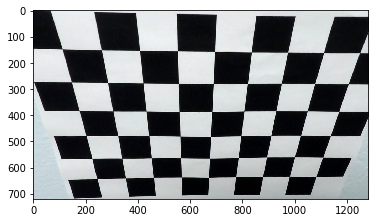

In [51]:
# load distorted image and get size
dist_img = cv2.imread('camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

# camera calibration (returns the camera matrix, distortion coefficients, rotation and translation vectors)
ret, mtx, dist_coeff, rvecs, tvecs = cv2.calibrateCamera(objpts, imgpts, img_size, None ,None)

undist = cv2.undistort(dist_img, mtx, dist_coeff, None, mtx)
# plt.imshow(undist)
# cv2.imwrite('output_images/calibration2_undistorted.jpg', undist)